In [375]:
# ==========CHAPTER 1, sample problem 1: Infiltration================
# ========================Horton_infiltration========================
# This code solves the example Horton infltration model in the class notes
# Converted from MATLAB to Python by Nicole Osorio, 01/2021.

# Import libraries used throughout the script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [376]:
#Discretize time over the 5 hours of interest
endt = 5
t = np.arange(0.0, endt, 0.001) # break the 5 hours into increments of 0.01 hrs

In [377]:
# We consider three different precipitation events, defined by a case number (1,2,3)
# setup=input('Which precipitation case do you want (1,2,3)? ')
setup = 2

In [378]:
#Parameters associated with the Horton Infiltration Capacity Model
fo=120 #mm/hr
fc=10  #mm/hr
k=1/2  #hr^-1

In [379]:
#Calculate the Horton Infiltration Capacity over the time of interest
fp=fc+(fo-fc)*np.exp(-k*t)

In [380]:
#Create pandas dataframe with rows as time and the column as Hortin Infilt. Cap.
df = pd.DataFrame(data=fp, index=t, columns = ['Infilt. Cap'])

In [381]:
# Determine time when infiltration capacity is reduced by 10%
criteria = fo-fo*0.1
time_result = abs(df['Infilt. Cap']-criteria).idxmin()
'Time when fc is reduced by 10 percent occurs at t={} hr.'.format(time_result)

'Time when fc is reduced by 10 percent occurs at t=0.231 hr.'

In [382]:
#Now we will plot the precipitation on the same plot - different for each case

df_P = pd.DataFrame(index=t, columns = ['P1', 'P2', 'P3'])

# Set values for Setup 1
df_P.loc[(df_P.index<=5), 'P1'] = 25

# Set values for Setup 2
df_P.loc[(df_P.index<=1), 'P2'] = 25
df_P.loc[(df_P.index>1) & (df_P.index <=3 ), 'P2'] = 10
df_P.loc[(df_P.index>3) & (df_P.index <=5 ), 'P2'] = 50

# Set values for Setup 3
df_P.loc[(df_P.index<=1), 'P3'] = 50
df_P.loc[(df_P.index>1) & (df_P.index <=3 ), 'P3'] = 25
df_P.loc[(df_P.index>3) & (df_P.index <=5 ), 'P3'] = 10

if setup == 1:
    P = df_P['P1']
elif setup == 2:
    P = df_P['P2']
else:
    P = df_P['P3']

In [383]:
# Now find the minimum of Infiltration Capacity (fp) and Precipitation (P) at each point in time
# Infiltration=fp    # Assume Infiltration rate is given by fp, the Horton Infiltration Capacity

Infilt = np.where((P<fp), P, fp) # Now replace all elements with those of P, where P<fp
Infiltration = np.array(Infilt, dtype=float)

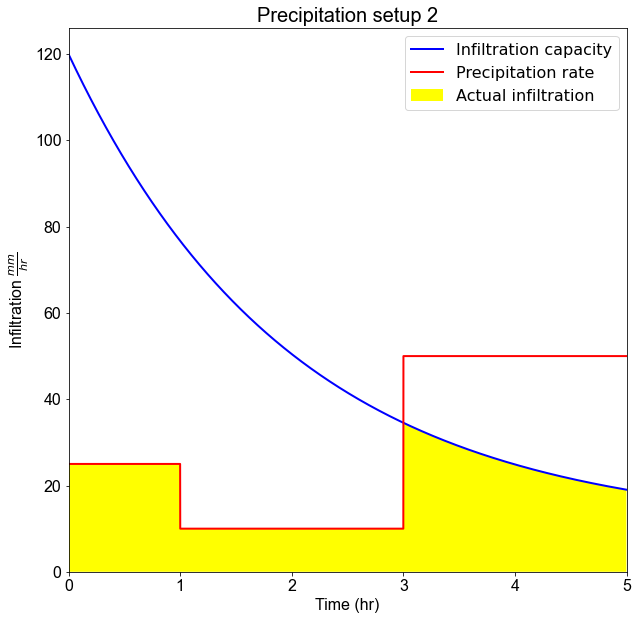

In [384]:
#plt.rcParams["figure.figsize"] = (10,10)

plt.plot(t, fp, color = 'blue', linewidth = 2, label = 'Infiltration capacity')

plt.plot(t,P, color = 'red', linewidth = 2, label = 'Precipitation rate')

# Plot this minimum of fp and P to verify that it is indeed correct

plt.stackplot(t,Infiltration, labels=('Actual infiltration',), colors='yellow')

plt.title('Precipitation setup {}'.format(setup), fontname ='Arial', fontsize = 20)
plt.ylabel(r"Infiltration $\frac{mm}{hr}$", fontname = 'Arial', fontsize=16)
plt.yticks(fontname = 'Arial', fontsize=16)

plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=16)
plt.xticks(fontname = 'Arial', fontsize=16)

plt.ylim(bottom=0)
plt.xlim([0, endt]) 

plt.legend(loc='upper right', fontsize = 16)
plt.show()

In [385]:
# Finally, get the total infiltration we have to integrate this over the whole time by numerical integration
dt=t[2]-t[1]                # size of the time step
Total_I=np.sum(Infiltration*dt) # mm, simple integration scheme

Area = 100*(1e3)**2                 # m^2
Total_I_final = Total_I*1e-3           # m
Vol_I = Total_I_final*Area                # m^3

'Total infiltration = {:.2f} m and Vol infiltrated = {:.2e} m^3.'.format(Total_I_final, Vol_I)

'Total infiltration = 0.10 m and Vol infiltrated = 9.60e+06 m^3.'